# Lab Session 5 : Classification II

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Move to the folder where your data is stored.

In [ ]:
import os
os.chdir('./drive/MyDrive/ITP2-Lab5')

In [ ]:
!ls

'Assignment5_full(수업용).ipynb'  'In calss.ipynb'	        test.csv
 Assignment5_student.ipynb	  'In calss(no answer).ipynb'   train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#  Read Data
train_data = pd.read_csv('train.csv');
test_data = pd.read_csv('test.csv');

## 1. Exploratory Data Analysis (탐색적 자료 분석)


First, we will use exploratory data analysis to determine what information about passengers should be included in the model to predict survival well.  

And the data is pre-processed so that it can be learned by machine learning.  

After that, we will use logistic and SVM classification algorithms to build a survivor prediction model and examine the results.

Let's load the top 5 lines of dataset.  


In [ ]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train_data is used for each row to display "PassangerId".  
"Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" information.   
Here, 11 pieces of information except for "Survived" correspond to the feature, and "Survived" corresponds to the label.

We need to understand the meaning of each column variable.  
This is number of siblings or Spouse  
parch's meaning is the number of parents or children traveling together.  

p class is the class of the room. The rich mostly stayed at class 1, ordinary people at class 2, and the poor at class 3.    
Embarked implies where the traveler mounted from.


As far as we can see, "PassangerId" is simply a feature that is attached for ordering and it is not necessary data to judge whether passennger is actually alive. And because "Pclass", "Age", "SipSp", "Parch", "Fare" are numeric information, machine learning algorithm can be applied even without preprocessing. However, other information such as "Name", "Sex", "Ticket", "Cabin", "Embarked" need appropriate preprocessing such as removing information and extracting new information before vectorization.

In [ ]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's look test data.  
Unlike train_data, there is no "Survived" information corresponding to the label because test_data is data used to verify the model.  

**pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  


**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  



**sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  



**parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

We can check the distribution of each column value of data through the describe function.

In [ ]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
 train_data.describe() #default:all numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


These values allow us to understand the overall distribution and to make various interpretations.

The distribution of object type data can be seen by running this code

In [ ]:
train_data.describe(include=['O']) #object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Also, you can see that the size of each feature is different. That is, there is null data that has not been observed.

Let's handle null values ​​in the preprocessing later.

In [ ]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


For "count", train_data has a total of 891, so most information has 891 values. However, we can confirm that some portions of the information of "Cabin" and "Embarked" are unknown.

 For "Unique", "Name" has the value of 891, so everyone in train_data has a different name. There are two gender, male and female, so it has a value of 2. Ticket and cabin are 681 and 147, respectively, and there are passengers with the same ticket or cabin number. Finally, since Titanic has three departing ports, so embarked is three.

 "top" is the most common information, and "freq" is the number of that information. Because "Name" is different for each person, freq is 1 and the value of top is not significant. "Sex" is 577 male, so there were 577 men and 314 women passengers. And if you look at "Embarked" you can see that most of the passengers (644) boarded at port "S" (Southampton).


Next, we examine how each of feature is related with "Survived".

I would make the following hypothesis.
First, the survival rate will be lower if passenger family is riding together. Also, the more people stayed in a first class room, they have more chance to be rescued than poor people who stayed third class room.

First, the relationship between "Pclass" and "Survived".

In [ ]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_data[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

We can also represent this in graph.

Set hue: the color changes according to the category value

<Axes: xlabel='Pclass', ylabel='count'>

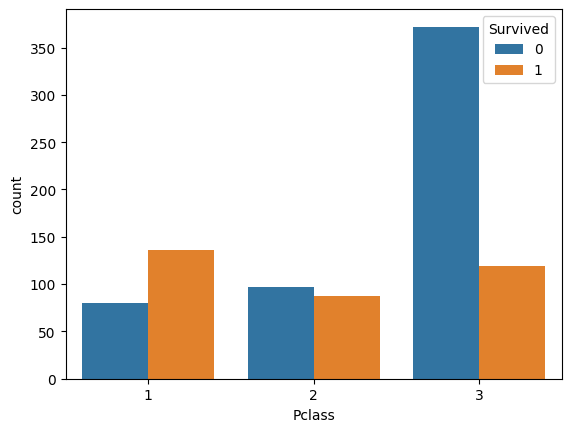

In [ ]:
import seaborn as sns
sns.countplot(data=train_data, x="Pclass", hue="Survived")

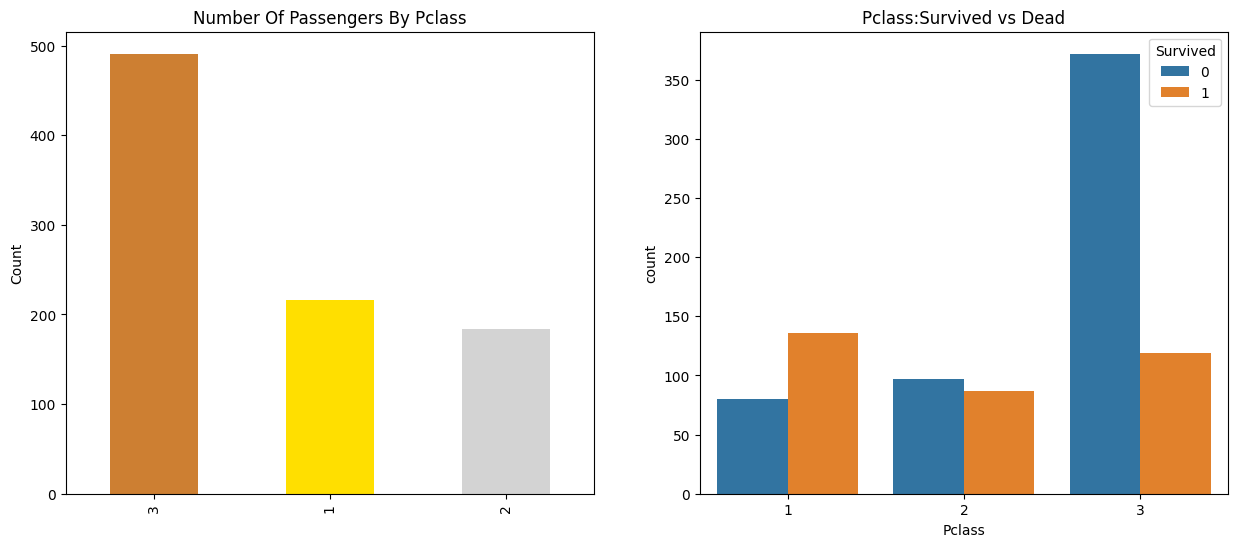

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

 The results show that the higher the ticket rating, the higher the survival rate.

In [ ]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


 In general, the lower the number of brothers and sisters shows the higher the survival rate.

In [ ]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


"Parch" is the number of parents and children. The lower the number, as in "SibSp" above, the higher the survival rate.

 "SibSp" and "Parch", as we have seen above, tend to have a high survival rate when the number is small, but it is difficult to find a direct association. Therefore,we may apply the following preprocessing: '0' if the number is small (less or equal to 4) and '1' if it is big (more than 4). Since both of them indicate the number of family members, it is desirable to use "FamilySize" which is the sum of the two values ​​rather than using both of them.

## 2. Preprocessing(데이터 전처리 과정)

Now let's do some preprocessing.

First, we create a new feature called "FamilySize" by adding "Sibsp" and "Parch".

In [ ]:
# Read Data
preprocessing_train_data = pd.read_csv('train.csv')
preprocessing_test_data = pd.read_csv('test.csv')

# Add "SibSp" and "Parch" to make "FamilySize"
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch']

# Delete "SibSp" abd "Parch"
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Print top 5 values
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=True)

,Survived
FamilySize,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


This may not be the best way.  
because a passenger with a family size of 0 has a lower survival rate than a passenger with a family size of 6.  
 The preprocessing process is very diverse, and the process determines the performance of the model.   
 I made a lot of omissions to make the model as simple as possible.

To simplify further, we change each value of "FamilySize" to "1" if it is bigger than 4 and "0" if it is smaller than or equal to 4.

In [ ]:
# Divide "Family size" into 0 and 1 based on 4
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

# Print top 5 valus
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
# Statistics between "FamilySize" and "Survived"
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
0,0.396919
1,0.148936


Name", "Ticket", and "Cabin" cannot be directly related to "Survived". Therefore, we may remove these three features.

 However, if you look at "Name", you find information such as 'Mr', 'Mrs', 'Capt', 'Master' and so on. We extract this information from "Name" and create a new feature.

 I'll just show this code. Extract the string part from the name, make it a new feature title, and drop the name, ticket, and cabin.


In [ ]:
# Extract "Name" and create "Title"
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

# Delete "Name", "Ticket", "Cabin" features
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Print statistics of "Title"
pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


There are very few passengers with "Title" other than "Master", "Mr", "Mrs", and "Ms". So we replace these rare titles with "Rare" and titles for females such as "MS", "Mlle", and "Mmn" are combined with "Miss". After substitution, we vectorize 'Mr' to '1', 'Miss' to '2', 'Mrs' to '3', 'Master' to '4', 'Rare' to '5' and set '0' if "Title" is unknown. This can be done in the code below.

In [ ]:
#The rest except the main "Title" is classified as "Rare"
preprocessing_train_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
preprocessing_test_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)

# Unify 'Ms', 'Mlle', 'Mme' as 'Miss'
preprocessing_train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
preprocessing_test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)

# "Title" vectorization
preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)

# Set '0' for unknown "Title"
preprocessing_train_data['Title'].replace([None], [0], inplace=True)
preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# Print top 5 values
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,0,1
1,2,1,1,female,38.0,71.2833,C,0,3
2,3,1,3,female,26.0,7.9250,S,0,2
3,4,1,1,female,35.0,53.1000,S,0,3
4,5,0,3,male,35.0,8.0500,S,0,1


###**DIY**
"Sex" and "Embarked" are information that directly affects "Survived". Therefore, these two pieces of information do not require any preprocessing; we simply restore the missing parts and run vectorization.

 First, we restore the two lost data of "Embarked". In this preproessing, we would like to designate two "Embakred" information as 'S' port where the most passengers have boarded. Then, we set 'female' of 'Sex' to '0', and '1' to 'male', 'Q', 'C', 'S' of 'Embarked' are set to '0' 1 'and' 2 ', respectively. You can do these in the code below.


In [ ]:
# Fill unknown "Embarked" to 'S'
preprocessing_train_data['Embarked'].fillna('S', inplace=True)
preprocessing_test_data['Embarked'].fillna('S', inplace=True)

# "Embarked", "Sex" vectorization
preprocessing_train_data.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'Q': 0, 'C': 1, 'S': 2}}, inplace=True)
preprocessing_test_data.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'Q': 0, 'C': 1, 'S': 2}}, inplace=True)

# Print top 5 values
print(preprocessing_train_data[['Sex', 'Embarked']].head())


,Sex,Embarked
0,1,2
1,0,1
2,0,2
3,0,2
4,1,2


In case of "Age", there are 177 missing data and we restore them by the average age (30) of the rest of the passengers.

In [ ]:
print(preprocessing_train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         0
FamilySize       0
Title            0
dtype: int64


In [ ]:
preprocessing_train_data['Age'].fillna(preprocessing_train_data['Age'].mean(), inplace=True)
preprocessing_test_data['Age'].fillna(preprocessing_train_data['Age'].mean(), inplace=True)

The results contain 7 features which are "Title", "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize". Note that "Age" and "Fare" need proper normalization.

Perform "standardization" for these two features using StandardScaler

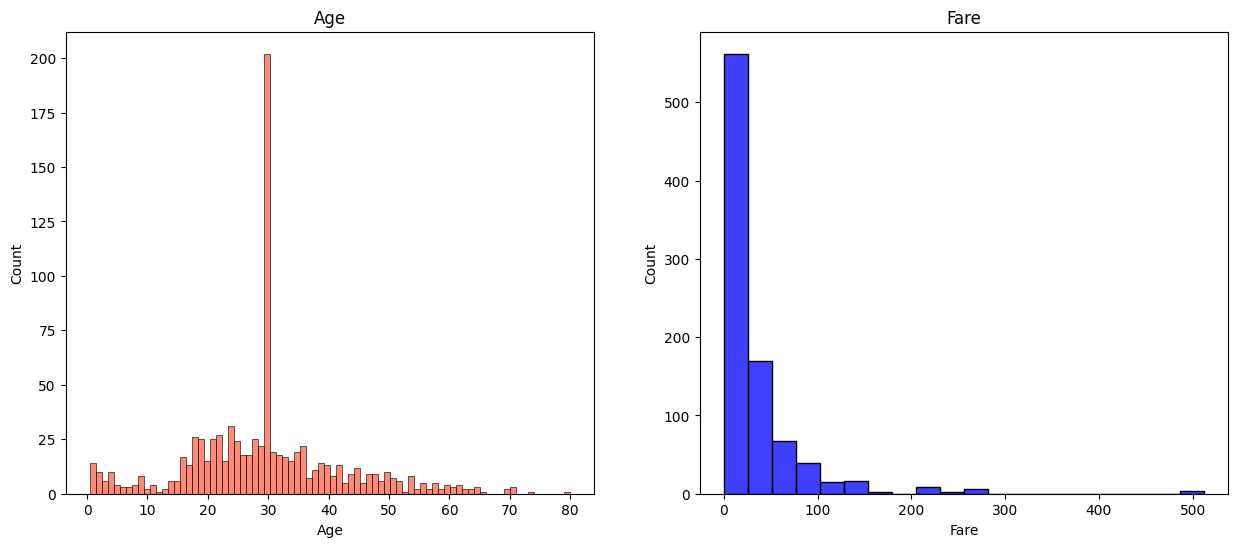

In [ ]:
#Before standardization
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(preprocessing_train_data["Age"],bins=80,color="tomato", ax=ax[0])
ax[0].set_title('Age')
ax[0].set_ylabel('Count')

sns.histplot(preprocessing_train_data["Fare"],bins=20,color="blue",ax=ax[1])
ax[1].set_title('Fare')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Age','Fare']
scaler = StandardScaler()
scaler.fit(preprocessing_train_data[features])
preprocessing_train_data[features] = scaler.transform(preprocessing_train_data[features])
preprocessing_test_data[features] = scaler.transform(preprocessing_test_data[features])

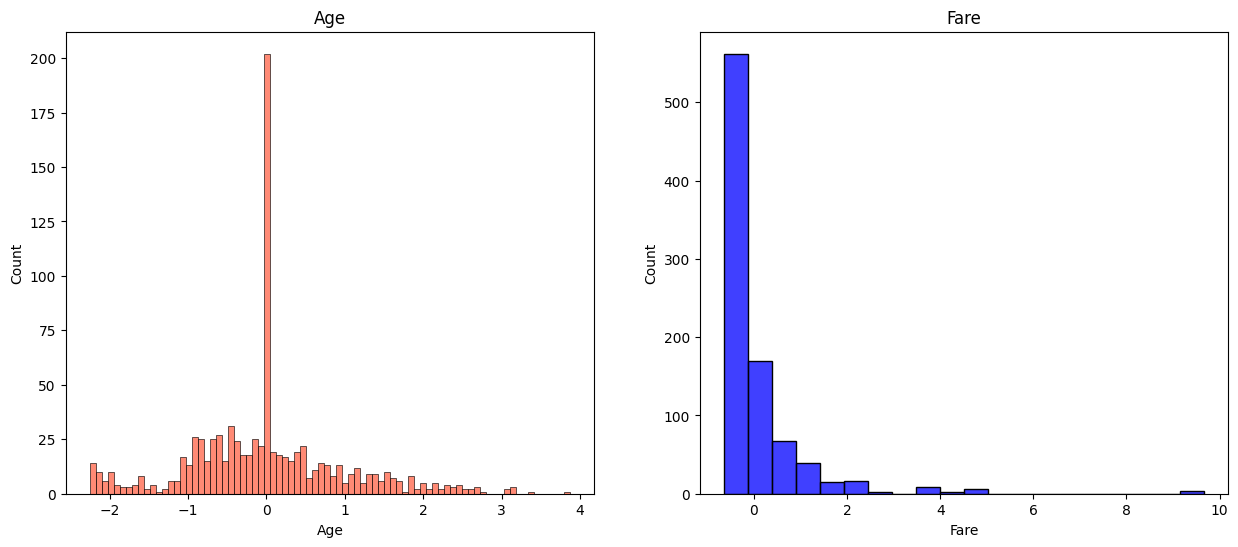

In [ ]:
#After standardization
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(preprocessing_train_data["Age"],bins=80,color="tomato", ax=ax[0])
ax[0].set_title('Age')
ax[0].set_ylabel('Count')

sns.histplot(preprocessing_train_data["Fare"],bins=20,color="blue",ax=ax[1])
ax[1].set_title('Fare')
plt.show()

## 3.  Machine Learning

Now we apply machine learning algorithms to preprocessed data. In this project, we will use 'Logistic Regression', and 'SVM'.

 To use each algorithm, we create training data by removing "Survived" and "PassangerId" from preprocessed data,

 and extract only "Survived" to create label data, (remove "PassagerId" from the test data),

  apply each algorithm, predict the test data with the resulting model. The code is shown below.

In [ ]:
# Creating data for training
X_train = preprocessing_train_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train = preprocessing_train_data["Survived"]
X_test = preprocessing_test_data.drop(['PassengerId'], axis=1)

In [ ]:
classifier = LogisticRegression()

We can change the optimizer of the model, the number of layers, the running rate value, etc.

Fit the classifier to the training data


How does the fit method work?
Under the hood, the fit method uses an optimization algorithm to find the best parameters for the machine learning model. The exact algorithm used varies depending on the specific model being trained, but in general, the fit method works by iteratively adjusting the model parameters based on the gradient of the loss function.

The loss function is a measure of how well the model is performing on the training data. The goal of the fit method is to minimize the loss function by adjusting the model parameters. Once the loss function has been minimized, the model is considered “trained” and can be used to make predictions on new data.



In [ ]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#If need to increase your maximum iterations.
LogisticRegression(solver='lbfgs', max_iter=100)

LogisticRegression()

Check the accuracy, AUC, and ROC curve of the classifier set above


Accuracy:  81.14
Area Under the Curve:  0.87


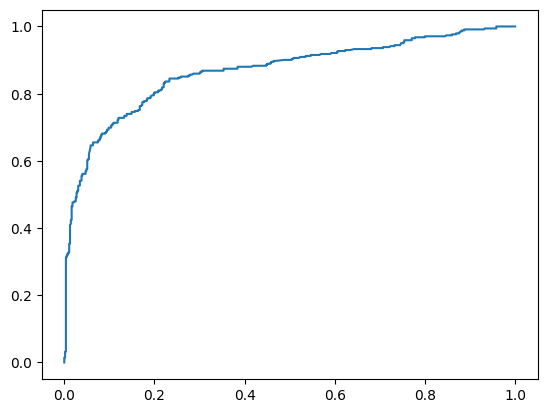

In [ ]:
accuracy = classifier.score(X_train, Y_train) * 100
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

We can only measure the accuracy of the trian.

Because there is no survived value of test.

In the case of test, after we predict the value, upload it to Kaggle, and we will measure the accuracy and evaluate the performance of the model.

In [ ]:
# Test data prediction
predict = classifier.predict(X_test)
predict = np.round(predict)

# This is how the model predicted
result = test_data.copy()
result["PREDICTION"] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
